In [4]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [5]:
# Path ke dataset
dataset_dir = './dataset'  # Ganti dengan path ke dataset Anda

In [6]:
# Tahap 1: Load Data dan Augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi data
    rotation_range=20,  # Rotasi gambar
    width_shift_range=0.2,  # Pergeseran horizontal
    height_shift_range=0.2,  # Pergeseran vertikal
    shear_range=0.2,  # Translasi miring
    zoom_range=0.2,  # Zoom gambar
    horizontal_flip=True,  # Pembalikan horizontal
    fill_mode='nearest',  # Mode pengisian area kosong
    validation_split=0.2  # Membagi dataset untuk validasi
)

In [7]:
# Data pelatihan
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),  # Ukuran gambar
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1513 images belonging to 4 classes.


In [8]:
# Data validasi
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 376 images belonging to 4 classes.


In [9]:
# Tahap 2: Definisi Model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Layer konvolusi pertama
    layers.MaxPooling2D((2, 2)),  # MaxPooling pertama
    layers.Conv2D(64, (3, 3), activation='relu'),  # Layer konvolusi kedua
    layers.MaxPooling2D((2, 2)),  # MaxPooling kedua
    layers.Conv2D(128, (3, 3), activation='relu'),  # Layer konvolusi ketiga
    layers.MaxPooling2D((2, 2)),  # MaxPooling ketiga
    layers.Flatten(),  # Flatten untuk menyederhanakan bentuk data
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout untuk mencegah overfitting
    layers.Dense(4, activation='softmax')  # Output layer (4 kelas)
])


c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Tampilkan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Tahap 3: Training Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Early stopping
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

c:\Users\CAMBANG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 754ms/step - accuracy: 0.3415 - loss: 1.4198 - val_accuracy: 0.3670 - val_loss: 1.2874
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 705ms/step - accuracy: 0.5088 - loss: 1.1330 - val_accuracy: 0.4335 - val_loss: 1.2423
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 704ms/step - accuracy: 0.5986 - loss: 0.9554 - val_accuracy: 0.4707 - val_loss: 1.1418
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 710ms/step - accuracy: 0.6220 - loss: 0.9548 - val_accuracy: 0.5106 - val_loss: 1.0424
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 701ms/step - accuracy: 0.6587 - loss: 0.8647 - val_accuracy: 0.5904 - val_loss: 0.9929
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 696ms/step - accuracy: 0.6885 - loss: 0.8235 - val_accuracy: 0.5452 - val_loss: 1.0976
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 34s 701ms/step - accuracy: 0.6840 - loss: 0.7714 - val_accuracy: 0.5824 - val_loss: 0.9519
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 716ms/step - accuracy: 0.7005 - loss: 0.7571 - val_accu

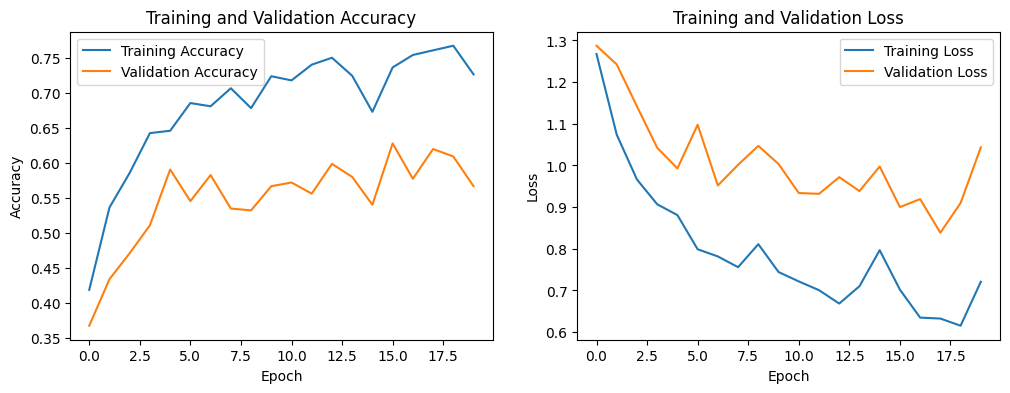

In [13]:
# Tahap 4: Evaluasi Model
# Plot akurasi dan loss selama training
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# Evaluasi akhir pada data validasi
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.6075 - loss: 0.8240
Validation Accuracy: 0.60
Validation Loss: 0.85
